# **Hybrid CNN-FNN Classifier on CIFAR-10 Dataset**

## Loading Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from tabulate import tabulate

## Loading Dataset

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [3]:
# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


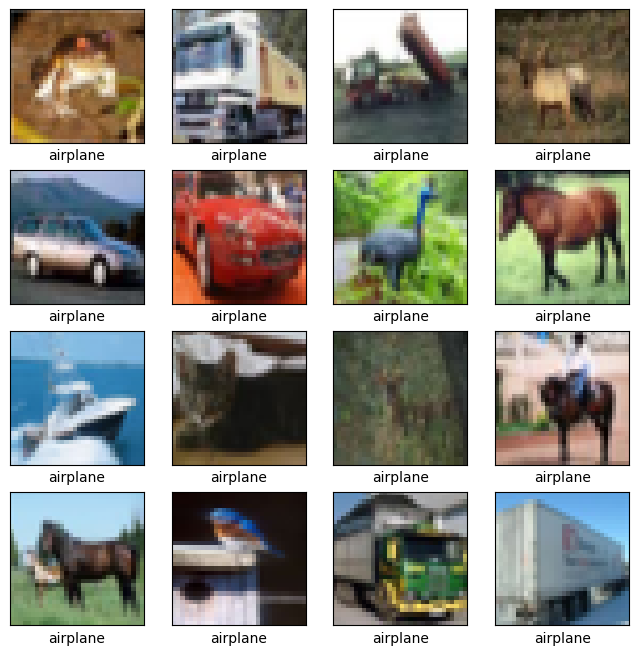

In [4]:
# Display some images from the dataset (optional)
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i][0])])
plt.show()

## Defining the Hybrid Model

In [ ]:
def create_hybrid_model():
    model = models.Sequential()
    
    # CNN part
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten the output for the fully connected part
    model.add(layers.Flatten())
    
    # FNN part
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

model = create_hybrid_model()

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Training the Model

In [7]:
history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_test, y_test),
                    batch_size=64)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.1996 - loss: 2.0747 - val_accuracy: 0.4685 - val_loss: 1.4487
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.4427 - loss: 1.5046 - val_accuracy: 0.5474 - val_loss: 1.2260
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5487 - loss: 1.2687 - val_accuracy: 0.6165 - val_loss: 1.0864
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5977 - loss: 1.1428 - val_accuracy: 0.6558 - val_loss: 0.9779
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6423 - loss: 1.0385 - val_accuracy: 0.6623 - val_loss: 0.9646
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.6713 - loss: 0.9610 - val_accuracy: 0.6836 - val_loss: 0.9091
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6935 - loss: 0.8960 - val_accuracy: 0.6841 - val_loss: 0.9160
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7218 - loss: 0.8281 - 

## Saving the model

In [17]:
# Save the model architecture as JSON
model_json = model.to_json()
with open("hybrid_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the weights with the correct filename
model.save_weights("hybrid_model_weights.weights.h5")

print("Model weights saved to disk.")


# # To Load Model ::
# # Load the JSON file that contains the model architecture
# with open('fnn_model.json', 'r') as json_file:
#     loaded_model_json = json_file.read()

# # Reconstruct the model from the JSON file
# loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# # Load the saved weights into the model
# loaded_model.load_weights("fnn_model_weights.h5")

# print("Model loaded from disk.")



Model weights saved to disk.


## Evaluating the Model Predictions

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc*100:.2f}%')


313/313 - 2s - 5ms/step - accuracy: 0.7280 - loss: 0.9925
Test accuracy: 72.80%


#### Plot: Accuracy vs Epoch

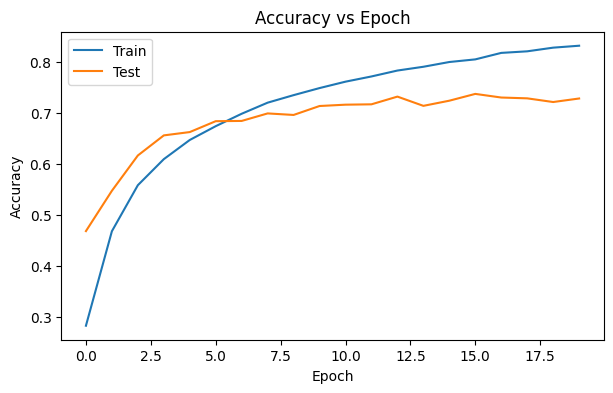

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(7, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('accuracy_vs_epoch_Hybrid.png')



#### Plot: Loss vs Epoch

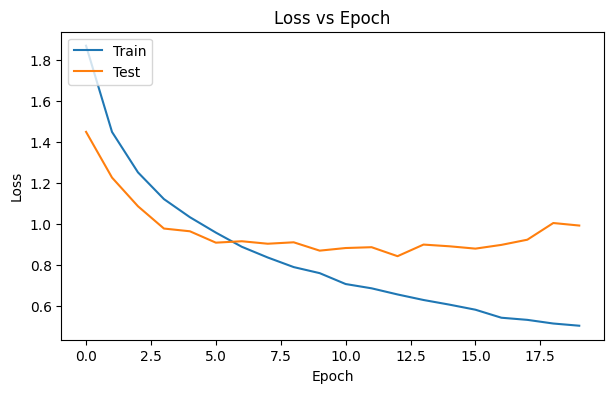

In [10]:
# Plot training & validation loss values
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('loss_vs_epoch_Hybrid.png')

plt.show()


### Visualising the Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


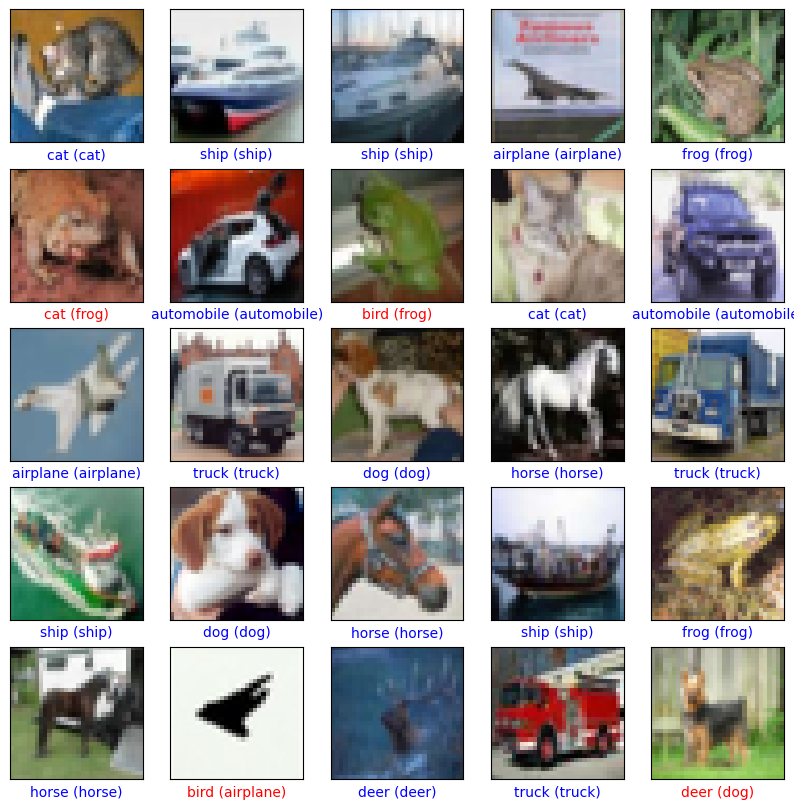

In [19]:
# Make predictions
predictions = model.predict(x_test)

# Display some predictions
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[np.argmax(y_test[i])]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
    plt.savefig('Predictions_Hybrid.png')
plt.show()


### Tabulating Classification Report

In [20]:
# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()*100

# Calculate accuracy for each class
report_df['accuracy'] = report_df.apply(lambda row: row['support'] * row['recall'] / row['support'] 
    if row.name in class_names else np.nan, axis=1)

# Remove accuracy, macro avg, and weighted avg rows
report_df = report_df.loc[class_names]

# Select and reorder columns
report_df = report_df[['accuracy', 'precision', 'recall', 'f1-score']]


# Round the DataFrame to 2 decimal places
report_df = report_df.round(2)

Accuracy: 72.80


#### Display the Table

In [21]:
# Display the classification report in a box format
print(tabulate(report_df, headers='keys', tablefmt='grid'))

# Optionally, save the table to a CSV file
report_df.to_csv('classification_report_Hybrid.csv', index=True)


+------------+------------+-------------+----------+------------+
|            |   accuracy |   precision |   recall |   f1-score |
+============+============+=============+==========+============+
| airplane   |       81.6 |       71.64 |     81.6 |      76.3  |
+------------+------------+-------------+----------+------------+
| automobile |       80.5 |       91.06 |     80.5 |      85.46 |
+------------+------------+-------------+----------+------------+
| bird       |       60   |       67.34 |     60   |      63.46 |
+------------+------------+-------------+----------+------------+
| cat        |       54.8 |       48.62 |     54.8 |      51.53 |
+------------+------------+-------------+----------+------------+
| deer       |       67.2 |       71.41 |     67.2 |      69.24 |
+------------+------------+-------------+----------+------------+
| dog        |       65.2 |       60.26 |     65.2 |      62.63 |
+------------+------------+-------------+----------+------------+
| frog    

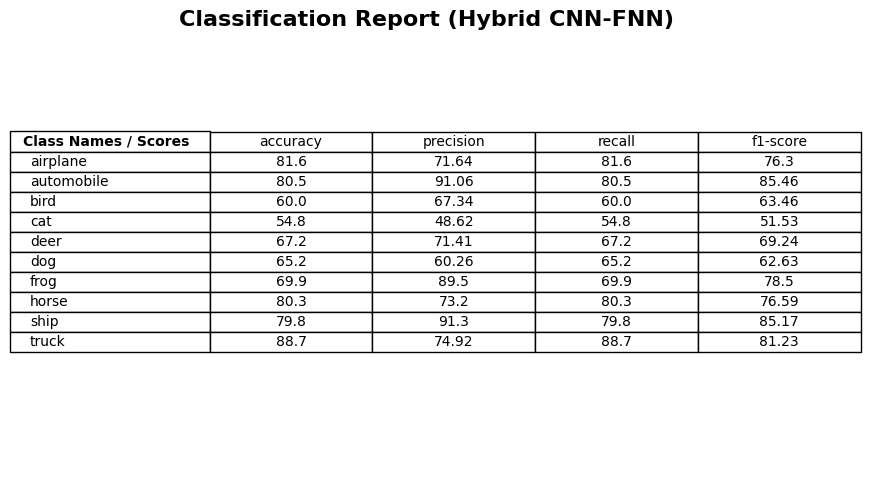

In [22]:
# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(7, 6))  # Adjust the size as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=report_df.values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 cellLoc='center',
                 loc='center')

# Adjust table properties
table.auto_set_font_size(True)
# table.set_fontsize(11)
table.scale(1.2, 1.2)

# Add corner label
table.add_cell(0, -1, width=0.15, height=0.045)
table[0, -1].set_text_props(text='Class Names / Scores', weight='bold')

# Add a title to the plot
plt.title('Classification Report (Hybrid CNN-FNN)', x=0.3, y=0.95, fontsize=16, fontweight='bold', ha='center')

# Adjust plot layout
# plt.subplots_adjust(top=1)

# Save the table as an image
plt.savefig('classification_report_Hybrid.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()